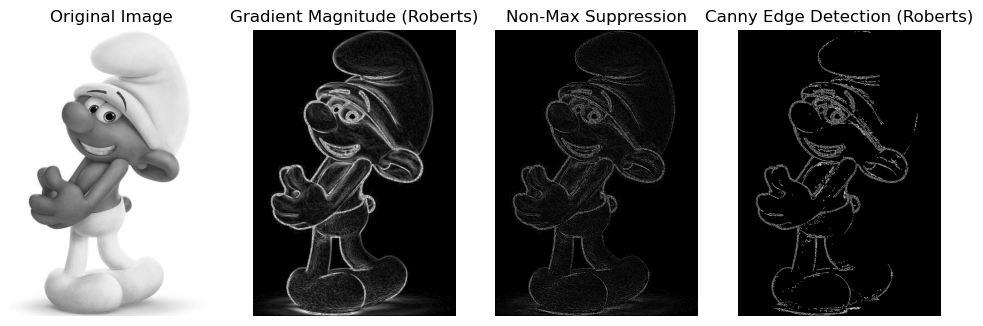

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load image in grayscale
image_path = r"C:\Users\student\Pictures\cv\smurfs.jpg"  # Change this accordingly
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Step 1: Apply Gaussian Blur for Noise Reduction
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 2: Compute Gradient Using Roberts Operator
roberts_x = np.array([[1, 0], [0, -1]])  # Roberts cross horizontal kernel
roberts_y = np.array([[0, 1], [-1, 0]])  # Roberts cross vertical kernel

gradient_x = convolve(blurred, roberts_x)
gradient_y = convolve(blurred, roberts_y)

# Compute magnitude of gradient
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude)) * 255  # Normalize

# Compute gradient direction
gradient_direction = np.arctan2(gradient_y, gradient_x)

# Step 3: Non-Maximum Suppression
def non_max_suppression(grad_mag, grad_dir):
    rows, cols = grad_mag.shape
    suppressed = np.zeros((rows, cols), dtype=np.uint8)
    angle = grad_dir * (180 / np.pi)  # Convert to degrees
    angle[angle < 0] += 180  # Ensure angles are between 0-180

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            q, r = 255, 255  # Initialize to high values

            # Check pixel gradient direction and compare neighbors
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q, r = grad_mag[i, j + 1], grad_mag[i, j - 1]  # Horizontal edge
            elif 22.5 <= angle[i, j] < 67.5:
                q, r = grad_mag[i + 1, j - 1], grad_mag[i - 1, j + 1]  # Diagonal edge
            elif 67.5 <= angle[i, j] < 112.5:
                q, r = grad_mag[i + 1, j], grad_mag[i - 1, j]  # Vertical edge
            elif 112.5 <= angle[i, j] < 157.5:
                q, r = grad_mag[i - 1, j - 1], grad_mag[i + 1, j + 1]  # Diagonal edge

            if grad_mag[i, j] >= q and grad_mag[i, j] >= r:
                suppressed[i, j] = grad_mag[i, j]
            else:
                suppressed[i, j] = 0

    return suppressed

nms_result = non_max_suppression(gradient_magnitude, gradient_direction)

# Step 4: Double Thresholding
low_threshold = 50
high_threshold = 100

strong_edges = (nms_result >= high_threshold).astype(np.uint8) * 255
weak_edges = ((nms_result >= low_threshold) & (nms_result < high_threshold)).astype(np.uint8) * 255

# Step 5: Edge Tracking by Hysteresis
def edge_tracking(strong_edges, weak_edges):
    rows, cols = strong_edges.shape
    final_edges = np.copy(strong_edges)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if weak_edges[i, j] == 255:
                # Check if any neighbor is a strong edge
                if (strong_edges[i-1:i+2, j-1:j+2] > 0).any():
                    final_edges[i, j] = 255
                else:
                    final_edges[i, j] = 0
    return final_edges

final_edges = edge_tracking(strong_edges, weak_edges)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude (Roberts)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(nms_result, cmap='gray')
plt.title("Non-Max Suppression")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(final_edges, cmap='gray')
plt.title("Canny Edge Detection (Roberts)")
plt.axis("off")

plt.show()


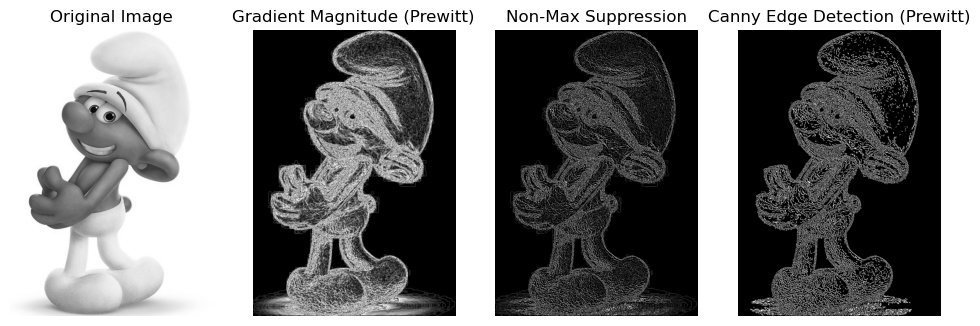

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load image in grayscale
image_path = r"C:\Users\student\Pictures\cv\smurfs.jpg"  # Change this accordingly
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Step 1: Apply Gaussian Blur for Noise Reduction
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 2: Compute Gradient Using Prewitt Operator
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # Horizontal kernel
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Vertical kernel

gradient_x = convolve(blurred, prewitt_x)
gradient_y = convolve(blurred, prewitt_y)

# Compute magnitude of gradient
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude)) * 255  # Normalize

# Compute gradient direction
gradient_direction = np.arctan2(gradient_y, gradient_x)

# Step 3: Non-Maximum Suppression
def non_max_suppression(grad_mag, grad_dir):
    rows, cols = grad_mag.shape
    suppressed = np.zeros((rows, cols), dtype=np.uint8)
    angle = grad_dir * (180 / np.pi)  # Convert to degrees
    angle[angle < 0] += 180  # Ensure angles are between 0-180

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            q, r = 255, 255  # Initialize to high values

            # Check pixel gradient direction and compare neighbors
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q, r = grad_mag[i, j + 1], grad_mag[i, j - 1]  # Horizontal edge
            elif 22.5 <= angle[i, j] < 67.5:
                q, r = grad_mag[i + 1, j - 1], grad_mag[i - 1, j + 1]  # Diagonal edge
            elif 67.5 <= angle[i, j] < 112.5:
                q, r = grad_mag[i + 1, j], grad_mag[i - 1, j]  # Vertical edge
            elif 112.5 <= angle[i, j] < 157.5:
                q, r = grad_mag[i - 1, j - 1], grad_mag[i + 1, j + 1]  # Diagonal edge

            if grad_mag[i, j] >= q and grad_mag[i, j] >= r:
                suppressed[i, j] = grad_mag[i, j]
            else:
                suppressed[i, j] = 0

    return suppressed

nms_result = non_max_suppression(gradient_magnitude, gradient_direction)

# Step 4: Double Thresholding
low_threshold = 50
high_threshold = 100

strong_edges = (nms_result >= high_threshold).astype(np.uint8) * 255
weak_edges = ((nms_result >= low_threshold) & (nms_result < high_threshold)).astype(np.uint8) * 255

# Step 5: Edge Tracking by Hysteresis
def edge_tracking(strong_edges, weak_edges):
    rows, cols = strong_edges.shape
    final_edges = np.copy(strong_edges)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if weak_edges[i, j] == 255:
                # Check if any neighbor is a strong edge
                if (strong_edges[i-1:i+2, j-1:j+2] > 0).any():
                    final_edges[i, j] = 255
                else:
                    final_edges[i, j] = 0
    return final_edges

final_edges = edge_tracking(strong_edges, weak_edges)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude (Prewitt)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(nms_result, cmap='gray')
plt.title("Non-Max Suppression")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(final_edges, cmap='gray')
plt.title("Canny Edge Detection (Prewitt)")
plt.axis("off")

plt.show()


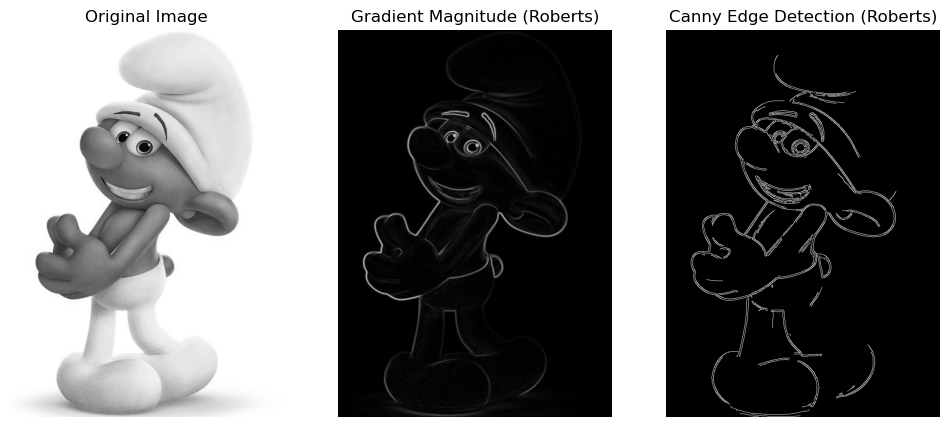

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image_path = r"C:\Users\student\Pictures\cv\smurfs.jpg"  # Change this accordingly
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Step 1: Apply Gaussian Blur for Noise Reduction
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 2: Compute Gradient Using Roberts Operator
roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

# Convert to float32 before applying filter
blurred = blurred.astype(np.float32)

gradient_x = cv2.filter2D(blurred, -1, roberts_x)
gradient_y = cv2.filter2D(blurred, -1, roberts_y)

# Convert gradients to float32 to avoid errors
gradient_x = gradient_x.astype(np.float32)
gradient_y = gradient_y.astype(np.float32)

# Compute magnitude of gradient
gradient_magnitude = cv2.magnitude(gradient_x, gradient_y)
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert back to uint8 for Canny
gradient_magnitude = np.uint8(gradient_magnitude)

# Step 3: Use OpenCV's Canny Edge Detection
edges = cv2.Canny(gradient_magnitude, 50, 100)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude (Roberts)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection (Roberts)")
plt.axis("off")

plt.show()


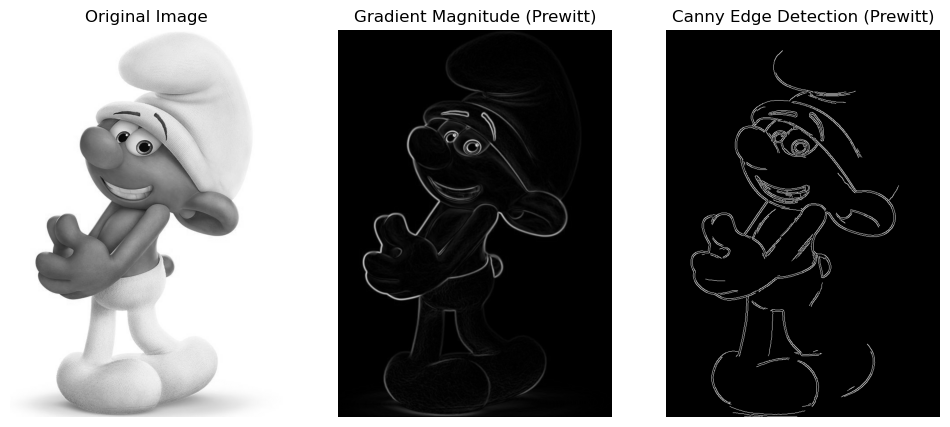

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image_path = r"C:\Users\student\Pictures\cv\smurfs.jpg"  # Change this accordingly
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Step 1: Apply Gaussian Blur for Noise Reduction
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 2: Compute Gradient Using Prewitt Operator
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

# Convert to float32 before applying filter
blurred = blurred.astype(np.float32)

gradient_x = cv2.filter2D(blurred, -1, prewitt_x)
gradient_y = cv2.filter2D(blurred, -1, prewitt_y)

# Convert gradients to float32 to avoid errors
gradient_x = gradient_x.astype(np.float32)
gradient_y = gradient_y.astype(np.float32)

# Compute magnitude of gradient
gradient_magnitude = cv2.magnitude(gradient_x, gradient_y)
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert back to uint8 for Canny
gradient_magnitude = np.uint8(gradient_magnitude)

# Step 3: Use OpenCV's Canny Edge Detection
edges = cv2.Canny(gradient_magnitude, 50, 100)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude (Prewitt)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection (Prewitt)")
plt.axis("off")

plt.show()
